In [1]:
## Description: https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/
## https://stackoverflow.com/questions/54824033/example-to-use-scale-factor-and-add-offset-in-netcdf4-with-python

## USING BASE environment not the typical grospatial one

import netCDF4
import numpy as np

ModuleNotFoundError: No module named 'netCDF4'

In [2]:
#f = netCDF4.Dataset('E:/Agrodem/Raw_Rasters/AFRICA_WTD_annualmean.nc')
f = netCDF4.Dataset('~Falchetta_ElecAccess/tiersofaccess_SSA_2018.nc ', 'r')

In [3]:
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    disclaimer: These data can be used freely for research purposes provided that the following source is acknowledged: Fan Y, Miguez-Macho G, Jobbágy EG, Jackson RB, Otero-Casal C (2017): Hydrologic regulation of plant rooting depth, Proceedings of the National Academy of Sciences 114 (40), 10572-10577, doi: 10.1073/pnas.1712381114. These data are made available in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE
    reference: Fan Y, Miguez-Macho G, Jobbágy EG, Jackson RB, Otero-Casal C (2017): Hydrologic regulation of plant rooting depth, Proceedings of the National Academy of Sciences 114 (40), 10572-10577. doi: 10.1073/pnas.1712381114
    project: EartH2Observe
    acknowledgment: The EartH2Observe project has received funding from the European Union's Seventh Programme for research, technological d

In [4]:
print(f.variables.keys()) # get all variable names

dict_keys(['lat', 'lon', 'time', 'mask', 'WTD'])


In [11]:
for d in f.dimensions.items():
  print(d)

('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 8760)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 8880)
('time', <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 1)


In [12]:
mt = f.variables['time']
depth = f.variables['WTD']
x,y = f.variables['lon'], f.variables['lat']
print(mt)
print(x)
print(y)

<class 'netCDF4._netCDF4.Variable'>
int8 time(time)
unlimited dimensions: 
current shape = (1,)
filling on, default _FillValue of -127 ignored
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    long_name: longitude
    units: degrees_E
unlimited dimensions: 
current shape = (8880,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    long_name: latitude
    units: degrees_N
unlimited dimensions: 
current shape = (8760,)
filling on, default _FillValue of 9.969209968386869e+36 used


In [16]:
water_depth = f.variables['WTD'] # time variable
print(water_depth)

<class 'netCDF4._netCDF4.Variable'>
int16 WTD(time, lat, lon)
    description: water table depth
    units: m
    scale_factor: 0.015259021896696421
    add_offset: -499.99237048905167
    comment: annual mean
unlimited dimensions: 
current shape = (1, 8760, 8880)
filling on, default _FillValue of -32767 used


In [17]:
add_offset = f.variables['WTD'].add_offset
scale_factor = f.variables['WTD'].scale_factor

In [29]:
scale_factor, add_offset

(0.015259021896696421, -499.99237048905167)

In [20]:
packed_value = f.variables['WTD'][:]

In [21]:
unpacked_value = packed_value * scale_factor + add_offset

## nc reacer rasterio

In [7]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from rasterio.transform import from_origin


Raster width: 32768
Raster height: 11342
Raster CRS: None
Raster transform: | 1.00, 0.00, 0.00|
| 0.00, 1.00, 0.00|
| 0.00, 0.00, 1.00|
Raster count: 1
Raster bounds: BoundingBox(left=0.0, bottom=11342.0, right=32768.0, top=0.0)
Raster dtype: ('float32',)


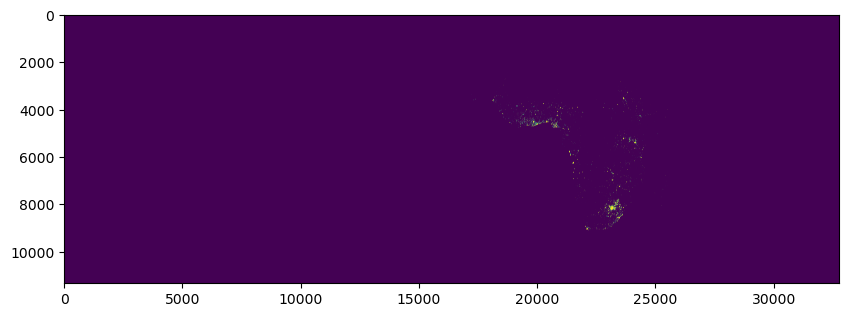

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

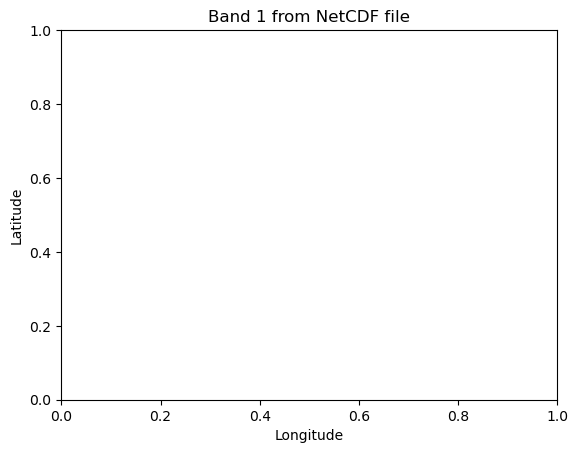

In [9]:
# Path to the NetCDF file
nc_file = "Residential/Data/Falchetta_ElecAccess/tiersofaccess_SSA_2018.nc"

# Open the NetCDF file using rasterio
with rasterio.open(nc_file) as src:
    # Read the first band (assuming the variable of interest is in the first band)
    band1 = src.read(1)
    
    # Print raster properties for debugging
    print(f"Raster width: {src.width}")
    print(f"Raster height: {src.height}")
    print(f"Raster CRS: {src.crs}")
    print(f"Raster transform: {src.transform}")
    print(f"Raster count: {src.count}")
    print(f"Raster bounds: {src.bounds}")
    print(f"Raster dtype: {src.dtypes}")

    # Define the correct transform and CRS if not set correctly
    # Example: Assuming each pixel is 0.1 degrees in size and the origin is at (0, 0)
    transform = from_origin(west=0, north=0, xsize=0.1, ysize=0.1)
    crs = 'EPSG:4326'  # WGS84

    # Plot the data
    plt.figure(figsize=(10, 6))
    show(band1, transform=src.transform, cmap='viridis')
    plt.title("Band 1 from NetCDF file")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar(label='Value')
    plt.show()

## tiff reader


In [ ]:
# Path to the raster file

pathElecAccess = "Residential/Data/Lighting/KEN_set_lightscore_2019.tif"

# Open the raster file
with rasterio.open(pathElecAccess) as raster:
    # Print raster properties
    band1= raster.read(1)
    print(f"Raster file: {pathElecAccess}")
    print(f"Raster width: {raster.width}")
    print(f"Raster height: {raster.height}")
    print(f"Raster CRS: {raster.crs}")
    print(f"Raster transform: {raster.transform}")
    print(f"Raster count: {raster.count}")
    print(f"Raster bounds: {raster.bounds}")
    print(f"Raster dtype: {raster.dtypes}")

    # Check if raster dimensions are valid
    if raster.width <= 0 or raster.height <= 0:
        raise ValueError("Raster width and height must be > 0")

    # Optionally, read the first band to ensure data is accessible
    data = raster.read(1)
    print(f"First band data type: {data.dtype}")
    print(f"First band shape: {data.shape}")

    # Plot the data
    plt.figure(figsize=(10, 6))
    show(band1, transform=raster.transform, cmap='viridis')
    plt.title("Band 1 from GeoTIFF file")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar(label='Value')
    plt.show()